In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# libraries as per requirements



In [2]:
 dataset_path = r"C:\Users\Harsh\Downloads\adverts.csv"
  # Update this path
df = pd.read_csv(dataset_path)


In [3]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [4]:
df.select_dtypes(include=['int64', 'float64']).columns


Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object')

In [5]:
df.select_dtypes(include=['object']).columns

Index(['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type'],
      dtype='object')

In [7]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


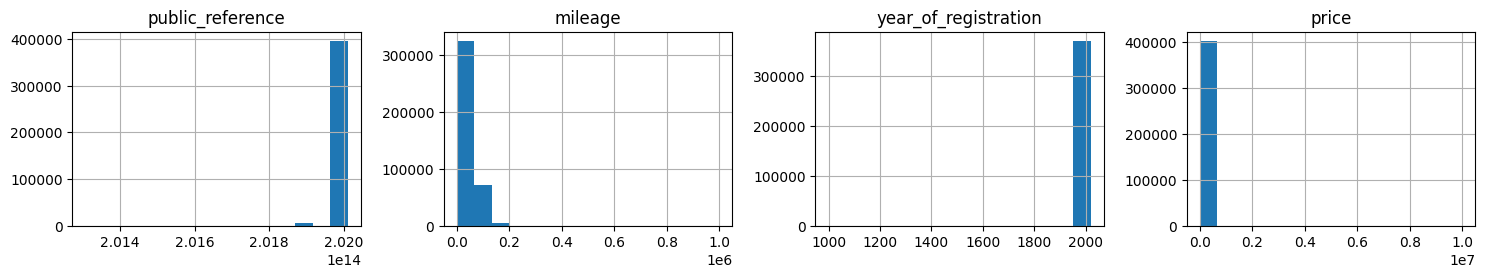

In [8]:

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()  # Adjusts plot parameters for better layout.
plt.show()


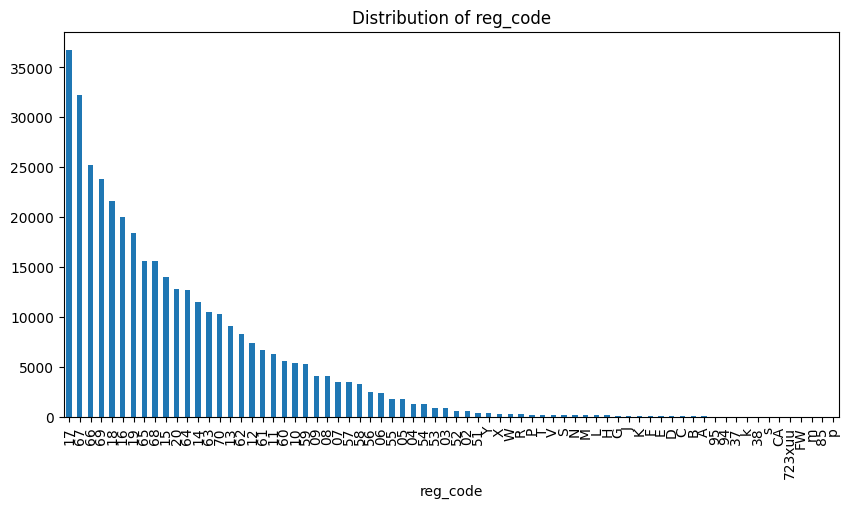

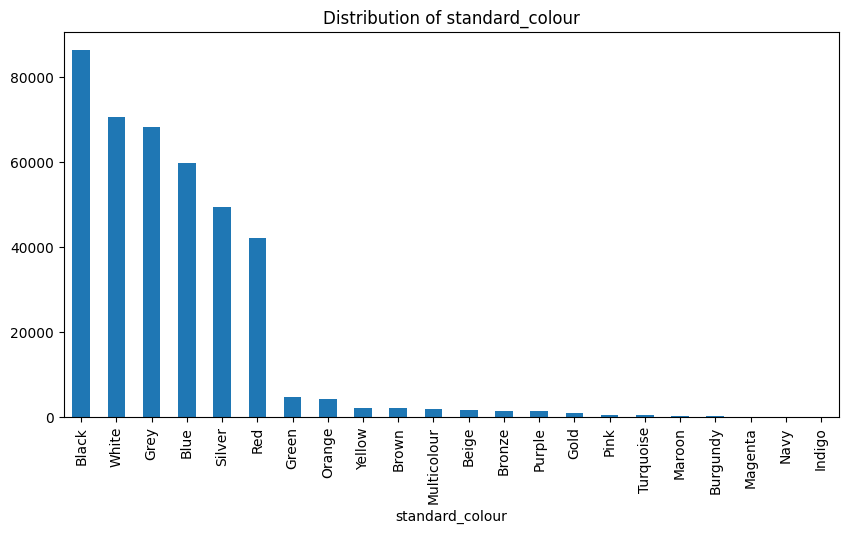

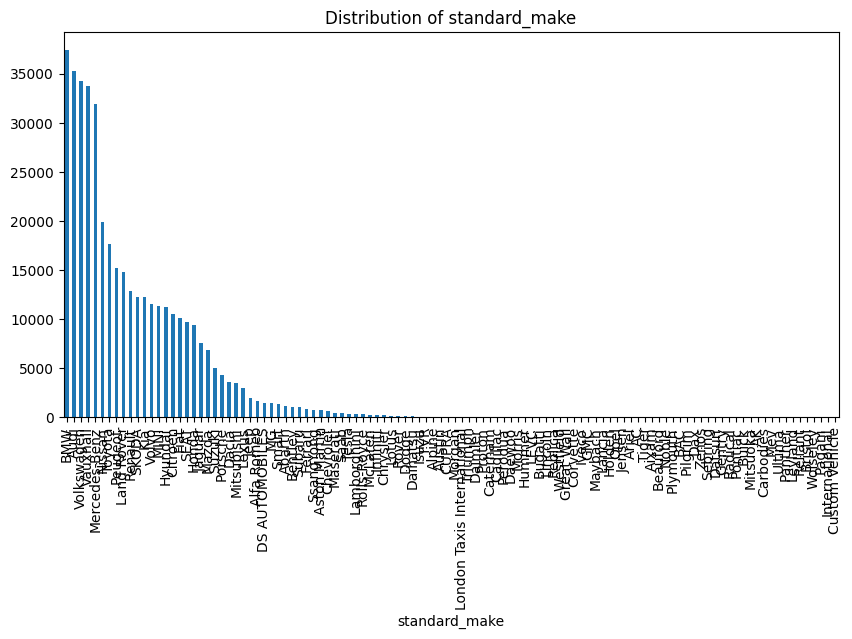

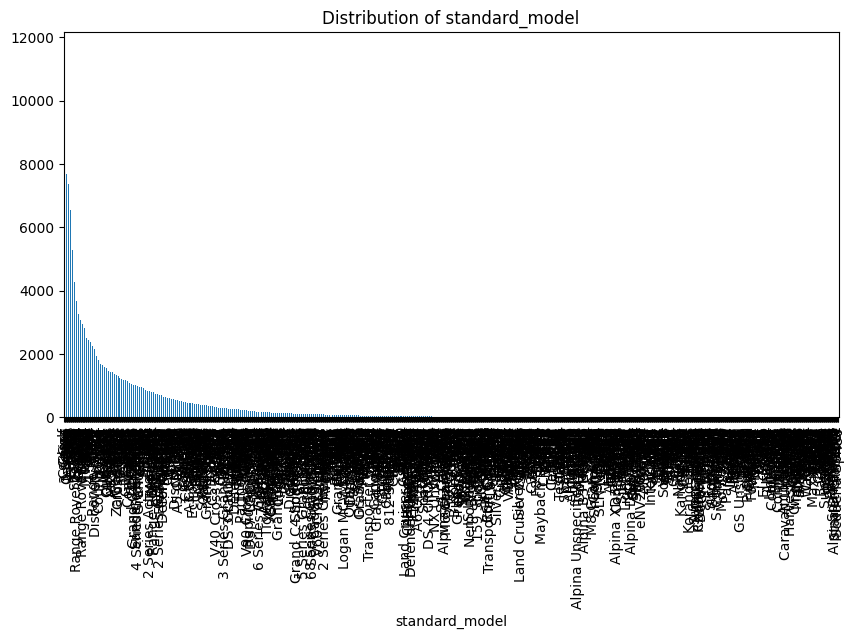

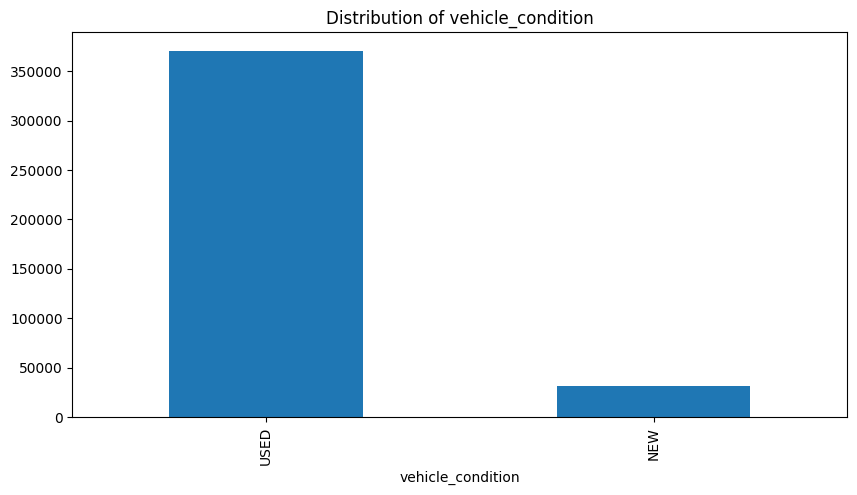

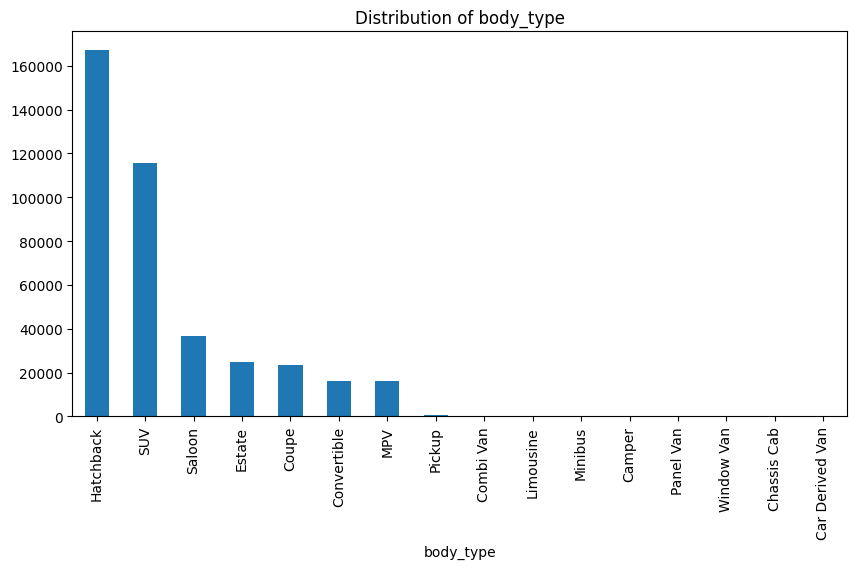

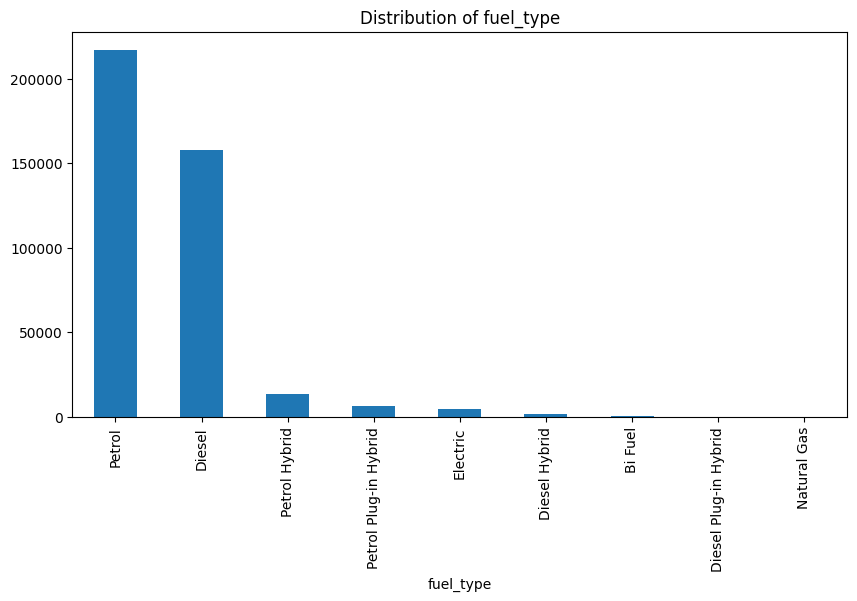

In [9]:
# Loop through each categorical feature and create a bar plot.
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.show()


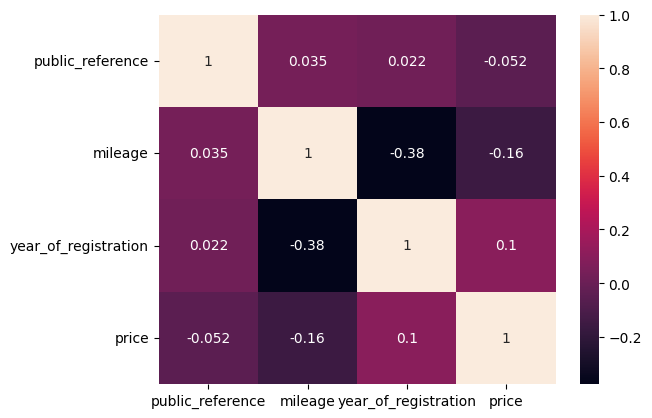

In [10]:
# Select only numerical features for correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


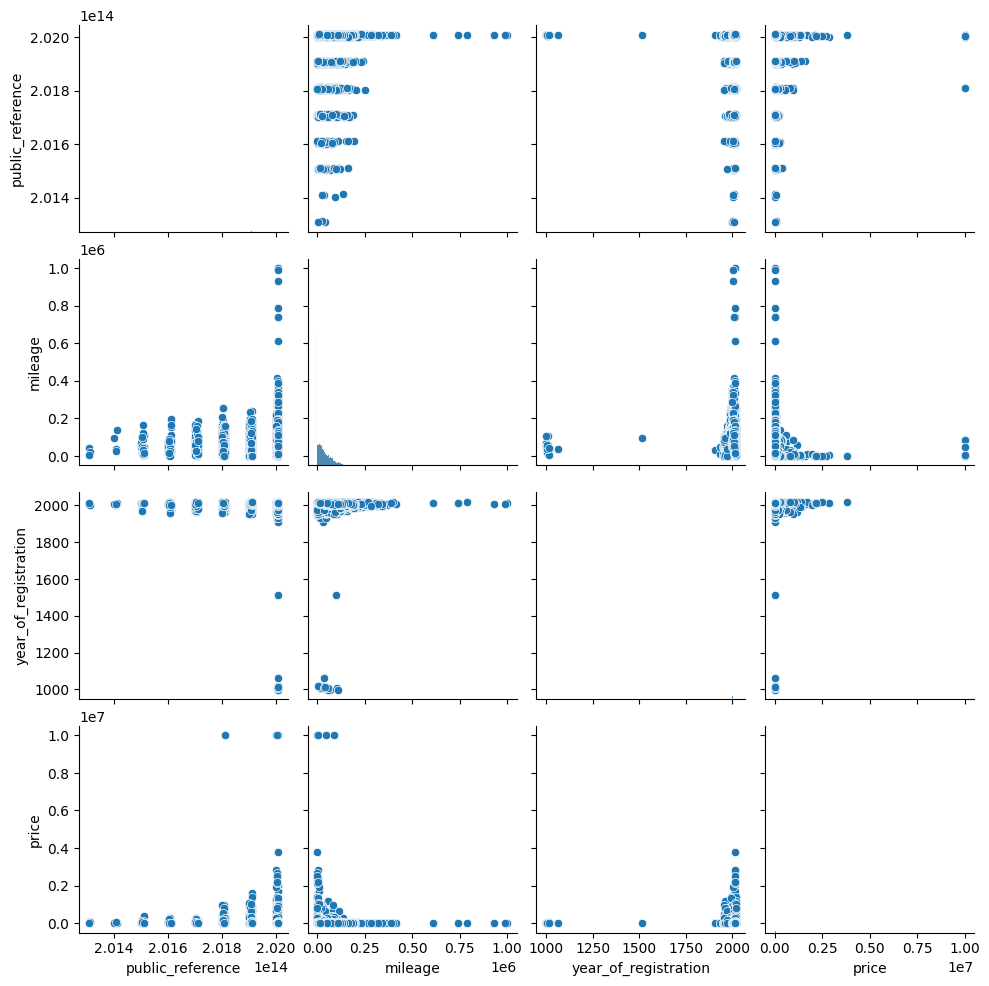

In [11]:
sns.pairplot(df[numerical_features[:4]])  # Adjust as necessary


In [ ]:
df.loc[:, 'mileage'] = df['mileage'].fillna(df['mileage'].median())
df.loc[:, 'year_of_registration'] = df['year_of_registration'].fillna(df['year_of_registration'].median())


In [ ]:
df.loc[:, 'reg_code'] = df['reg_code'].fillna(df['reg_code'].mode()[0])
df.loc[:, 'standard_colour'] = df['standard_colour'].fillna('Unknown')
df.loc[:, 'body_type'] = df['body_type'].fillna('Unknown')
df.loc[:, 'fuel_type'] = df['fuel_type'].fillna('Unknown')


In [ ]:
df = df.loc[(df['year_of_registration'] <= 2024) & (df['year_of_registration'] >= 1980)]


In [ ]:
df.loc[:, 'vehicle_age'] = 2024 - df['year_of_registration']


<ipython-input-33-051f2fdb8e38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'vehicle_age'] = 2024 - df['year_of_registration']


In [ ]:
df.loc[:, 'price'] = np.log1p(df['price'])
df.loc[:, 'mileage'] = np.log1p(df['mileage'])


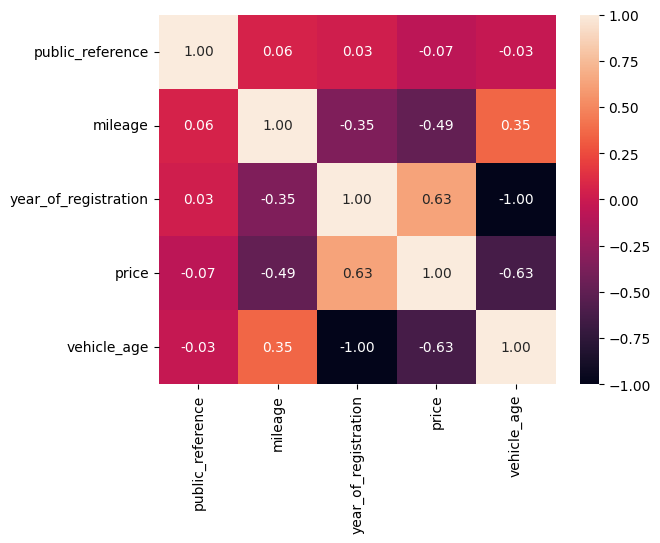

In [ ]:
# just calculating the correlation
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [7]:
import pandas as pd

dataset_path = r"C:\Users\Harsh\Downloads\prepared_adverts.csv"
df = pd.read_csv(dataset_path)

# Quick check to ensure it's loaded correctly
print(df.head())


   public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689  0.000000       17            Grey         Volvo   
1   202007020778260  1.262165       61            Blue        Jaguar   
2   202007020778474  1.193552       17            Grey         SKODA   
3   202007080986776  1.241506       16           Brown      Vauxhall   
4   202007161321269  1.250029       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration     price  \
0               XC90               NEW                2016.0  1.253441   
1                 XF              USED                2011.0  1.190236   
2               Yeti              USED                2017.0  1.210699   
3              Mokka              USED                2016.0  1.194302   
4  Range Rover Sport              USED                2015.0  1.228535   

   body_type  crossover_car_and_van              fuel_type  vehicle_age  
0        SUV                  False  Petrol Plug

In [8]:
from sklearn.model_selection import train_test_split

# 'price' is target variable. Drop it from X and set it as y.
X = df.drop('price', axis=1)
y = df['price']

# Split the data - 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the same set of dummy variables in both sets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.0060640471114167226


In [12]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feature_importances)


year_of_registration        0.388631
mileage                     0.126956
body_type_Hatchback         0.120343
vehicle_age                 0.087546
standard_make_Land Rover    0.017517
                              ...   
standard_make_Mitsuoka      0.000000
standard_model_Barchetta    0.000000
standard_model_MPV          0.000000
standard_model_Sunny        0.000000
standard_model_Jalpa        0.000000
Length: 1359, dtype: float64


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Initialize the Random Forest Regressor with constraints to reduce complexity
model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define the parameter range
param_dist = {
    'n_estimators': randint(10, 50),  # Fewer estimators for quicker computations
    'max_depth': [None, 5],  # Limited depth options to reduce complexity
    'min_samples_split': randint(6, 12)  # Higher minimum samples to reduce overfitting
}

# Sample a smaller subset for quicker hyperparameter tuning
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Set up the randomized search with limited iterations and fewer CV folds
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=3, cv=2, n_jobs=-1, random_state=42)
random_search.fit(X_sample, y_sample)

# Get the best model from randomized search
best_model = random_search.best_estimator_



In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on the test set
predictions = best_model.predict(X_test)

# Calculate RMSE and R² score
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")



Root Mean Squared Error: 0.00695140085394684
R² Score: 0.9245226116467085


C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


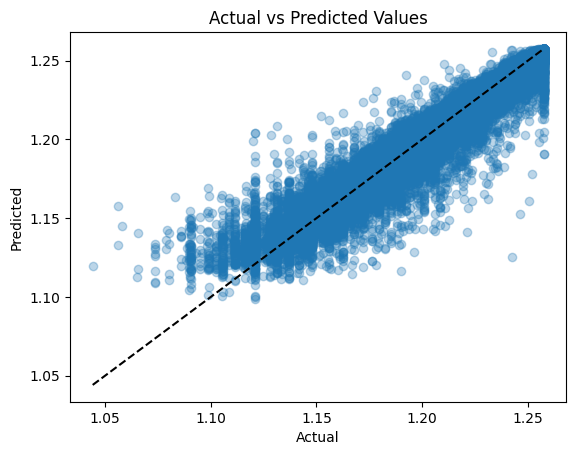

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


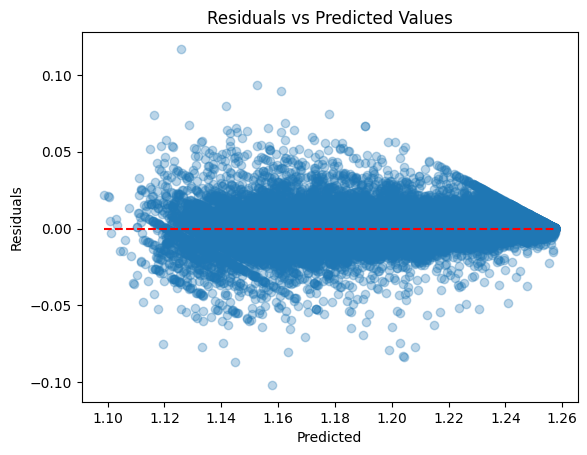

In [16]:
residuals = y_test - predictions

plt.scatter(predictions, residuals, alpha=0.3)
plt.hlines(y = 0, xmin = predictions.min(), xmax = predictions.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


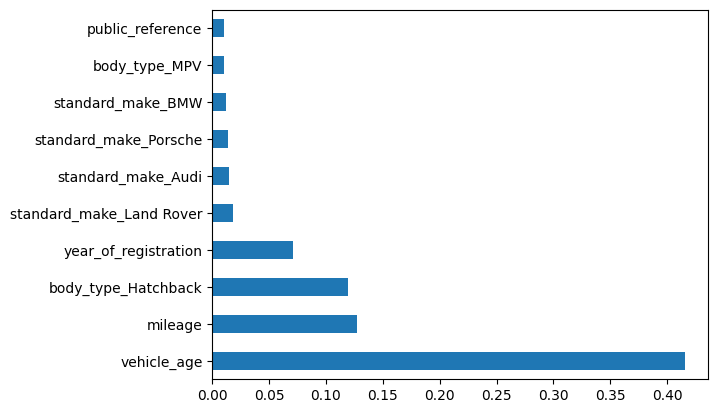

In [18]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


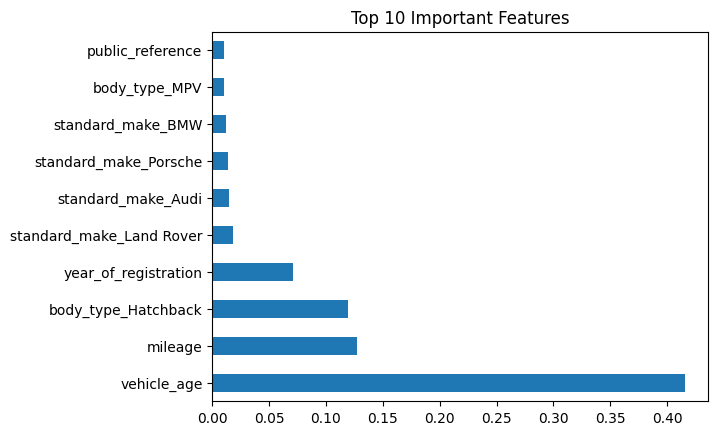

In [ ]:
import matplotlib.pyplot as plt

# Feature importance plot
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [35]:
from sklearn.inspection import permutation_importance

# Reducing the number of repeats for maximum speed
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=1,  # single repeat
    random_state=42, n_jobs=-1
)

# Sort the feature importances in descending order and take the indices
indices = np.argsort(result.importances_mean)[::-1]

# Now we will print the feature importance rankings directly
for f in range(X_test.shape[1]):
    print(f"{X_test.columns[indices[f]]}: {result.importances_mean[indices[f]]}")


mileage: 0.3178179781709888
vehicle_age: 0.3074547732079742
body_type_Hatchback: 0.2216412581344398
standard_make_Audi: 0.06767744211134608
standard_make_Land Rover: 0.04942747224252386
standard_make_BMW: 0.04691407267877867
year_of_registration: 0.03895103499001018
fuel_type_Petrol: 0.03287015660310155
standard_make_Mercedes-Benz: 0.02587431635388715
standard_make_Porsche: 0.022826890459546667
standard_make_Vauxhall: 0.02150706691169213
standard_model_Golf: 0.013961750615089308
body_type_MPV: 0.009492064396610322
body_type_Coupe: 0.008616326564392818
standard_make_Bentley: 0.007052981476464382
standard_make_Peugeot: 0.0068834833478567115
body_type_SUV: 0.005651028255466262
standard_make_Jaguar: 0.0046853376695715765
standard_make_Renault: 0.004550377486004287
standard_make_Volvo: 0.004453365005002374
fuel_type_Diesel: 0.003929096339448823
standard_model_A Class: 0.003769311568160738
standard_make_Ferrari: 0.0036787407782105097
standard_model_A1: 0.0036270155385560443
standard_make_Vol